# Desafío - Clasificación desde Machine Learning
- Karen Cortés
- Constanza Córdova

Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco.
Dentro de ésta se registran las siguientes observaciones:
- default: Variable binaria. Registra si el cliente entró en morosidad o no.
- income: Ingreso promedio declarado por el cliente.
- balance: Total de saldo en la cuenta de crédito.
- student: Variable binaria. Registra si el cliente es estudiante o no.

## Desafío 1: Preparación del ambiente de trabajo

Importamos los módulos básicos para el análisis de datos 

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('default_credit.csv')

In [4]:
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


## Desafío 2: Análisis exploratorio
Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
- Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
- Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
- Un boxplot del balance total de las cuentas, segmentado por el status de default.
- Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
- Un diagrama de dispersión entre balance e income, segmentado por el status de estudiante.
- Un diagrama de dispersión entre balance e income, segmentado por el status de default.
<br>Comente brevemente sobre los principales patrones de comportamiento.

Text(0.5, 1.0, 'Balance total de las cuentas segmentada por status de estudiante')

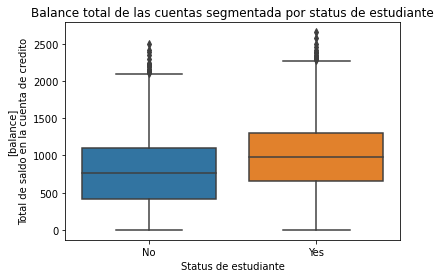

In [14]:
sns.boxplot(x=df['student'], y=df['balance'])
plt.ylabel('[balance]\nTotal de saldo en la cuenta de credito')
plt.xlabel('Status de estudiante')
plt.title('Balance total de las cuentas segmentada por status de estudiante')

Text(0.5, 1.0, 'Ingreso total de cada cliente, segmentado por el status de estudiante')

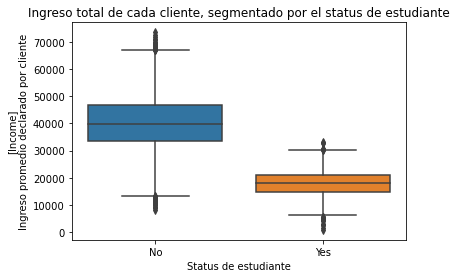

In [13]:
sns.boxplot(x=df['student'], y=df['income'])
plt.ylabel('[Income]\nIngreso promedio declarado por cliente')
plt.xlabel('Status de estudiante')
plt.title('Ingreso total de cada cliente, segmentado por el status de estudiante')

Text(0.5, 1.0, 'balance total de las cuentas, segmentado por el status de default.')

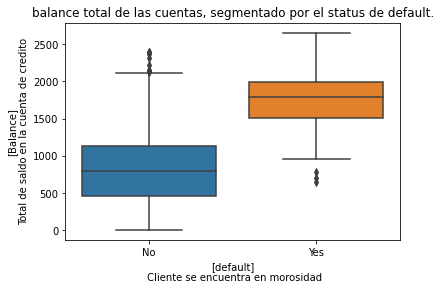

In [16]:
sns.boxplot(x=df['default'], y=df['balance'])
plt.ylabel('[Balance]\nTotal de saldo en la cuenta de credito')
plt.xlabel('[default]\n Cliente se encuentra en morosidad')
plt.title('balance total de las cuentas, segmentado por el status de default.')

Text(0.5, 1.0, 'Ingreso total de cada cliente, segmentado por el status de default')

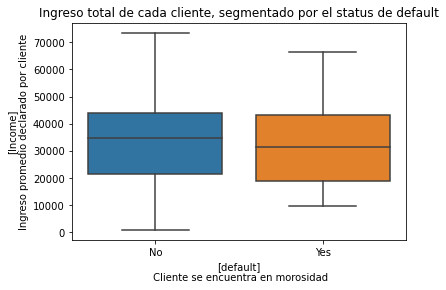

In [17]:
sns.boxplot(x=df['default'], y=df['income'])
plt.ylabel('[Income]\nIngreso promedio declarado por cliente')
plt.xlabel('[default]\n Cliente se encuentra en morosidad')
plt.title('Ingreso total de cada cliente, segmentado por el status de default')

Text(0.5, 1.0, 'Dispersión entre balance e income, segmentado por el status de estudiante')

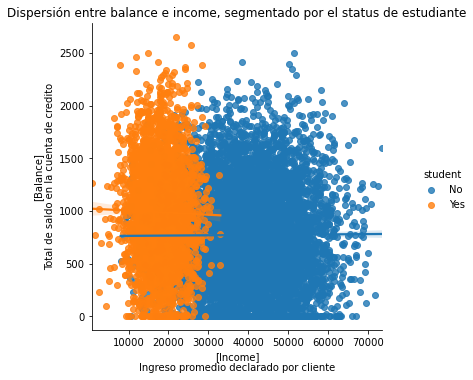

In [18]:
sns.lmplot(x='income', y='balance', data=df, hue='student')
plt.ylabel('[Balance]\nTotal de saldo en la cuenta de credito')
plt.xlabel('[Income]\nIngreso promedio declarado por cliente')
plt.title('Dispersión entre balance e income, segmentado por el status de estudiante')

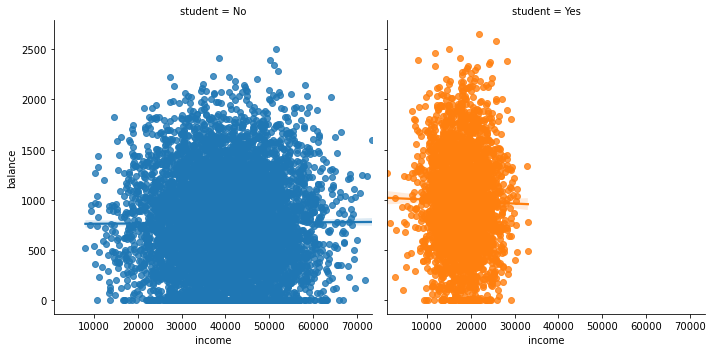

In [9]:
sns.lmplot(x='income', y='balance', col='student', data=df, hue='student')

Text(0.5, 1.0, 'Dispersión entre balance e income, segmentado por el status de default (morosidad)')

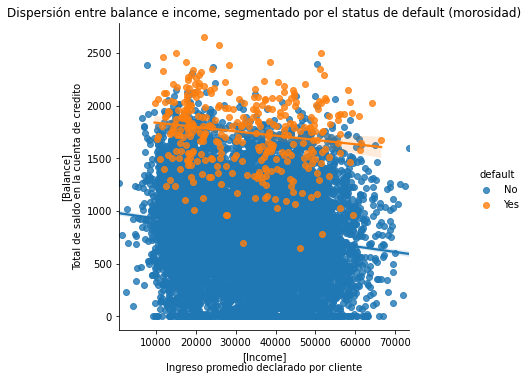

In [19]:
sns.lmplot(x='income', y='balance', data=df, hue='default')
plt.ylabel('[Balance]\nTotal de saldo en la cuenta de credito')
plt.xlabel('[Income]\nIngreso promedio declarado por cliente')
plt.title('Dispersión entre balance e income, segmentado por el status de default (morosidad)')

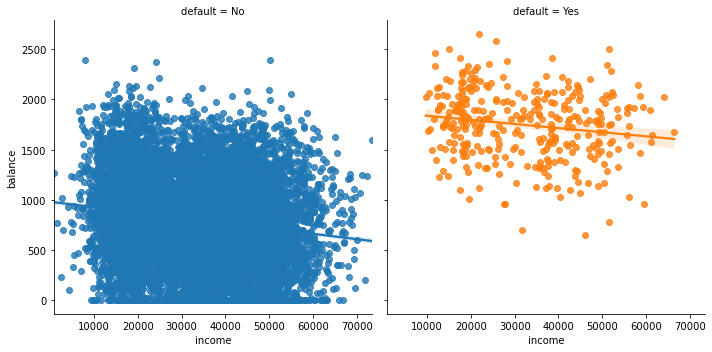

In [11]:
sns.lmplot(x='income', y='balance', col='default', data=df, hue='default')

##### Comente brevemente sobre los principales patrones de comportamiento

__R:__ Se puede apreciar que aquellos clientes que son estudiantes tienden a tener menores ingresos que aquellos que no lo son. 
<br>
Se puede apreciar que aquellos que entraron en morosidad (default) tienden a tener un mayor balance en relación a los que no.
<br>
Los morosos estan concentrados entre valores más altos de balance en comparación con los no morosos.

## Desafío 3: Modelación econométrica

- Recodifique las variables student y default para que adquieran atributos numéricos.
- Implemente el siguiente modelo econométrico:
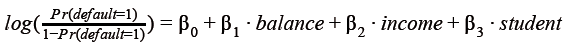
- A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [20]:
df['default_recod'] = np.where(df['default']=='Yes', 1, 0)
df['student_recod'] = np.where(df['student']=='Yes', 1, 0)

In [21]:
df.head()

,index,default,student,balance,income,default_recod,student_recod
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0


In [22]:
modelo_logit = smf.logit('default_recod ~ balance + income + student_recod', df).fit()

modelo_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          default_recod   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:                  0.4619
Time:                        14:21:13   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance           0.0057      0.000     24.737      0.000       0.005       0.006
income         3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_recod    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
=================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

##### Para depurar se dejan aquellas con un p-valor < 0.05

In [23]:
modelo_logit_depurado = smf.logit('default_recod ~ balance + student_recod', df).fit()

modelo_logit_depurado.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          default_recod   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:                  0.4619
Time:                        14:21:17   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance           0.0057      0.000     24.748      0.000       0.005       0.006
student_recod    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
=================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

##### comente brevemente sobre el comportamiento de los atributos.

__R:__ si se observa el pseudo R2 se puede apreciar que no hubo una mejora significativa entre el modelo inicial y el modelo mejorado, en ambos mostró un valor de 0.4619

## Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
- Estandarize la matriz de atributos.
- Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
- Implemente el modelo sin alterar los hiper parámetros.
- Genere la predicción de las clases y de la probabilidad.
- Reporte las métricas de precisión, recall y f1 para ambas clases.
- Grafique la curva Receiver Operator Characteristic.
- En base a los pasos, comente sobre el desempeño predictivo del modelo.

##### se genera subconjunto de entrenamiento y prueba

In [25]:
y_vector = df.loc[:, 'default_recod']

In [26]:
x_matriz = df.loc[:, ['balance', 'student_recod']]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_matriz, y_vector, test_size=.33,random_state=11238)

##### Se estandariza 

In [28]:
# estandarizamos la matriz de entrenamiento
x_train_std = StandardScaler().fit_transform(x_train)

# estandarizamos la matriz de validación
x_test_std = StandardScaler().fit_transform(x_test)

##### Se implementa el modelo

In [29]:
modelo_sin_alterar = LogisticRegression().fit(x_train_std, y_train)

##### Se genera la predicción de las clases y de la probabilidad.

In [30]:
predicho = modelo_sin_alterar.predict(x_test_std)

In [31]:
predicho_probabilidad = modelo_sin_alterar.predict_proba(x_test_std)

##### Reporte las métricas de precisión, recall y f1 para ambas clases.

In [32]:
print(classification_report(y_test, predicho))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3186
           1       0.76      0.32      0.45       114

    accuracy                           0.97      3300
   macro avg       0.87      0.66      0.72      3300
weighted avg       0.97      0.97      0.97      3300



###### Para mayor claridad se calcula ma matriz de confusión

In [33]:
from sklearn.metrics import confusion_matrix

m1_confusion = confusion_matrix(y_test, predicho)
m1_conf_pd = pd.crosstab(y_test, predicho)
m1_conf_pd

col_0,0,1
default_recod,,
0,3174,12
1,77,37


###### Grafique la curva Receiver Operator Characteristic.

In [34]:
false_positive, true_positive, threshold = roc_curve(y_test, predicho_probabilidad[:, 1])

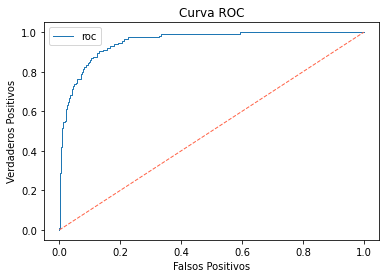

In [35]:
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1, label='roc')
plt.plot([0, 1], ls="--", lw=1, color='tomato')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');
plt.legend()

##### área debajo de la curva

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predicho_probabilidad[:, 1])

0.9531723218907281

##### comente sobre el desempeño predictivo del modelo.

__R:__ al observar los valores de support (la frecuencia de las clases) se puede ver que las clases están desbalanceadas, pues para la clase 0 (default = 0 cliente no moroso) obtuvo un valor bastante mayor que para la clase 1 (default = 1 cliente moroso).<br> 
En cuanto a la precisión se muestra un mejor desempeño para la clase 0 (default = 0 cliente no moroso) que para la clase 1 (default = 1 cliente moroso), debido a que la clase 0 tiene un valor más alto.<br> 
En cuanto al recall se puede ver que tiene un valor muy alto para clase 0 (default = 0 cliente no moroso) en comparación con la clase 1 (default = 1 cliente moroso).<br> 
Por lo que probablemente el modelo se ajustó a la clase que contiene una mayor cantidad de valores.